# Lesson 6 Dictionaries and DataFrames

## This lesson will provide a brief introduction to two of the basic ways to organize information in python. 

## **Dictionaries** are a built in method in Python

## **DataFrames** are a part of the `pandas` module.  They are very similar to dictionaries, but have become widely used because of the ease of importing and exporting data.  

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
import pandas as pd

## 6.1 Dictionaries

### Let's recall how lists work.  

In [5]:
my_kawhi_list = ['Kawhi','Leonard','June',29,1991,79.0]
print("Original List:", my_kawhi_list)
points = 26.0
rebounds = 6.6
assists = 5.0
steals = 1.7
blocks = 0.4
#lets add these numbers to the list 
my_kawhi_list.append(points)
my_kawhi_list.append(rebounds)
my_kawhi_list.append(assists)
my_kawhi_list.append(steals)
my_kawhi_list.append(blocks)
print("Updated List:", my_kawhi_list)

Original List: ['Kawhi', 'Leonard', 'June', 29, 1991, 79.0]
Updated List: ['Kawhi', 'Leonard', 'June', 29, 1991, 79.0, 26.0, 6.6, 5.0, 1.7, 0.4]


### What do you see as potential problems with organizing my data on NBA players in this manner?

### 6.1.1 Creating a Dictionary 

In [15]:
Player = dict() #create an empty dictionary 
Player['First Name'] = 'Kahwi'  #This is known as a 'key':value pair.  The 'key' is first name and the value in 'Kawhi'
print("first step:",Player)
Player['Last Name'] = 'Leonard'
print("Second step:",Player)
Player['Height'] = 79.0 # The value can be a float, integer, string, list, array, or even another dictionary. 
print("Last step:",Player) 

first step: {'First Name': 'Kahwi'}
Second step: {'First Name': 'Kahwi', 'Last Name': 'Leonard'}
Last step: {'First Name': 'Kahwi', 'Last Name': 'Leonard', 'Height': 79.0}


In [ ]:
#You could also have created the dictionary this way but I disapprove. 
#Player = {'First Name':'Kawhi','Last Name':'Leonard','Height':79.0}


### We can add modify and remove Dictionary entries.  

In [16]:
#%% Adding, Modifying, Removing Dictionary entries -Slide 17
points = 26.0
rebounds = 6.6
assists = 5.0
steals = 1.7
blocks = 0.4
#Add items to the dictionary
Player['Points'] = points 
Player['Rebounds'] = rebounds
stats = np.array([points,rebounds,assists,steals,blocks])
print(stats)
Player['Stats'] = stats
#remove stats that are already in Stats
del Player['Points']
del Player['Rebounds']
print(Player)
#Remove items from the dictionary 
del Player['Height']
#modify items in dictionary 
Player['First Name'] = 'Kawhi'

[26.   6.6  5.   1.7  0.4]
{'First Name': 'Kahwi', 'Last Name': 'Leonard', 'Height': 79.0, 'Stats': array([26. ,  6.6,  5. ,  1.7,  0.4])}


### So why do I love dictionaries.   Because I don't have to remember whats in them.

In [17]:
Player.keys()

dict_keys(['First Name', 'Last Name', 'Stats'])

### Everything contained in a dictionary can be made very explicit by the appropriate choice of keys. 

### The information in a dictionary retains its data type 

In [18]:
kawhi_stats = Player['Stats']

## 6.2 Pandas DataFrames

### `pandas` is a file i/o and data organization module that is widely used in python programming. 

### One of the best things about `pandas` is that is can read in two of the most common data file types, 
* csv  - comma separated values
* xls or xlsx - Microsoft Excel files.  

### In this example I am going to load a csv file, *candy-data.csv* which contains data from a well-know study of candy preferences. 

In [19]:
candy_data = pd.read_csv('candy-data.csv')

### Like a Dictionary, a DataFrame has keys  

In [20]:
print(candy_data.keys())

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')


### Let's examine some the entries.  

In [29]:
candyname = candy_data['competitorname']
is_choco = candy_data['chocolate']
win_percent = 100*candy_data['winpercent']
sugar_percent = 100*candy_data['sugarpercent']

### The datatype here is a **Series**.  Let's see what we can do with it. 

In [30]:
meansugar = np.mean(sugar_percent)
print(meansugar)

47.86470514588233


### Look's like we can apply numpy functions to it. But I have sometimes run into trouble with it, especially with plotting.  You can always do this: 

In [31]:
sugar_percent = np.array(sugar_percent)
print(sugar_percent)

[73.199999  60.399997   1.1        1.1       90.600002  46.5
 60.399997  31.299999  90.600002  60.399997  60.399997  73.199999
  4.6       73.199999  73.199999  12.7       73.199999  90.600002
 46.5       46.5       46.5       46.5       12.7       43.000001
 43.000001  43.000001   9.3000002 19.7       31.299999  22.
  4.6       26.699999  82.499999  82.499999  87.199998  30.199999
 60.399997  73.199999  96.499997  31.299999  31.299999  84.799999
 60.399997  31.299999  19.7       22.        46.5       59.299999
  9.3000002 60.399997  58.099997   3.4000002 72.000003  40.599999
 98.799998  73.199999  86.000001  73.199999  87.199998  22.
 94.099998  94.099998  26.699999  26.699999  54.6       60.399997
  6.8999998  6.8999998 15.099999  56.900001  96.499997  41.800001
 16.2       60.399997  60.399997  31.299999  17.399999  46.5
 31.299999  54.6       22.         9.3000002 31.299999  18.6
 87.199998 ]


### `array` is your friend!

### Lets end this on a note of talking about plots!

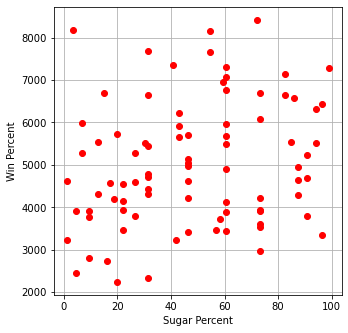

In [26]:
fig = plt.figure(figsize = (4,4))   #creates a blank canvas 
ax = fig.add_axes([0,0,1,1]) #creates an axes - (starting pt x, starting pt y, fractional size x, fractional size y)
ax.plot(sugar_percent,win_percent,'ro')
ax.set_xlabel('Sugar Percent')
ax.set_ylabel('Win Percent')
plt.grid()
#ax.set_xlim([0,100])
#ax.set_ylim([0,100])